In [1]:
pip install deepface

SyntaxError: invalid syntax (<ipython-input-1-b943716737cd>, line 1)

In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

In [2]:
idendities = {
  "Ariel_Sharon": [],
  "Colin_Powell": [],
  "Donald_Rumsfeld": [],
  "George_W_Bush": [],
  "Gerhard_Schroeder": [],
  "Hugo_Chavez": [],
  "Jean_Chretien": [],
  "John_Ashcroft": [],
  "Junichiro_Koizumi": [],
  "Tony_Blair": []
    
}

In [3]:
import os
from PIL import Image

for key, values in idendities.items():
    # Get the path to all the images
        for image in os.listdir("Dataset/DeepFace/{}".format(key)):
            path_string = os.path.join("Dataset/DeepFace/{}".format(key), image)
            image = Image.open(path_string)
            imgNp = np.array(image, "uint8")
            values.append(path_string)


In [4]:
idendities["George_W_Bush"]

['Dataset/DeepFace/George_W_Bush\\George_W_Bush_0001.jpg',
 'Dataset/DeepFace/George_W_Bush\\George_W_Bush_0002.jpg',
 'Dataset/DeepFace/George_W_Bush\\George_W_Bush_0003.jpg',
 'Dataset/DeepFace/George_W_Bush\\George_W_Bush_0004.jpg',
 'Dataset/DeepFace/George_W_Bush\\George_W_Bush_0005.jpg',
 'Dataset/DeepFace/George_W_Bush\\George_W_Bush_0006.jpg',
 'Dataset/DeepFace/George_W_Bush\\George_W_Bush_0007.jpg',
 'Dataset/DeepFace/George_W_Bush\\George_W_Bush_0008.jpg',
 'Dataset/DeepFace/George_W_Bush\\George_W_Bush_0009.jpg',
 'Dataset/DeepFace/George_W_Bush\\George_W_Bush_0010.jpg',
 'Dataset/DeepFace/George_W_Bush\\George_W_Bush_0011.jpg',
 'Dataset/DeepFace/George_W_Bush\\George_W_Bush_0012.jpg']

<h1>Positive samples<h1>
Find different photos of same people


In [ ]:
positives = []

for key, values in idendities.items():
    
    #print(key)
    for i in range(0, len(values)-1):
        for j in range(i+1, len(values)):
            #print(values[i], " and ", values[j])
            positive = []
            positive.append(values[i])
            positive.append(values[j])
            positives.append(positive)

In [ ]:
positives = pd.DataFrame(positives, columns = ["file_x", "file_y"])
positives["decision"] = "Yes"

In [ ]:
positives.shape


# Negative samples
Compare photos of different people

In [ ]:
samples_list = list(idendities.values())


In [ ]:
negatives = []

for i in range(0, len(idendities) - 1):
    for j in range(i+1, len(idendities)):
        #print(samples_list[i], " vs ",samples_list[j]) 
        cross_product = itertools.product(samples_list[i], samples_list[j])
        cross_product = list(cross_product)
        #print(cross_product)
        
        for cross_sample in cross_product:
            #print(cross_sample[0], " vs ", cross_sample[1])
            negative = []
            negative.append(cross_sample[0])
            negative.append(cross_sample[1])
            negatives.append(negative)

In [ ]:
negatives = pd.DataFrame(negatives, columns = ["file_x", "file_y"])
negatives["decision"] = "No"

In [ ]:
negatives = negatives.sample(positives.shape[0])


In [ ]:
negatives.shape


# Merge Positives and Negative Samples¶


In [ ]:
df = pd.concat([positives, negatives]).reset_index(drop = True)


In [ ]:
df.shape


In [ ]:
df.decision.value_counts()


In [ ]:
df = pd.concat([positives, negatives]).reset_index(drop = True)

In [ ]:
df.decision

# DeepFace

In [ ]:
from deepface import DeepFace
from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace

In [ ]:
pretrained_models = {}

pretrained_models["VGG-Face"] = VGGFace.loadModel()
print("VGG-Face loaded")

pretrained_models["Facenet"] = Facenet.loadModel()
print("Facenet loaded")

# pretrained_models["OpenFace"] = OpenFace.loadModel() 
# print("OpenFace loaded")

pretrained_models["DeepFace"] = FbDeepFace.loadModel()
print("FbDeepFace loaded")

In [ ]:
instances = df[["file_x", "file_y"]].values.tolist()


In [9]:
models = ['VGG-Face', 'Facenet', 'DeepFace']
metrics = ['cosine', 'euclidean', 'euclidean_l2']

In [ ]:
if True:
    for model in models:
        for metric in metrics:
            
            print("Processing ",model," ",metric)
            
            if model == 'OpenFace' and metric == 'euclidean': #this returns same with openface euclidean l2
                continue
            else:
                resp_obj = DeepFace.verify(instances
                                           , model_name = model
                                           , model = pretrained_models[model]
                                           , distance_metric = metric
                                           , detector_backend = 'mtcnn'
                                           , enforce_detection = False)

                distances = []

                for i in range(0, len(instances)):
                    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
                    distances.append(distance)

                df['%s_%s' % (model, metric)] = distances
    
    df.to_csv("face-recognition-pivot.csv", index = False)
else:
    #Ref: https://github.com/serengil/deepface/blob/master/tests/dataset/face-recognition-pivot.csv
    df = pd.read_csv("face-recognition-pivot.csv")

In [ ]:
df_raw = df.copy()


In [ ]:
df.head()


# Distribution

In [5]:
df = pd.read_csv("face-recognition-pivot.csv")

In [6]:
df_raw = df.copy()


In [7]:
df.head()

,file_x,file_y,decision,VGG-Face_cosine,VGG-Face_euclidean,VGG-Face_euclidean_l2,Facenet_cosine,Facenet_euclidean,Facenet_euclidean_l2,DeepFace_cosine,DeepFace_euclidean,DeepFace_euclidean_l2
0,[[[0 1 0]\n [0 1 0]\n [0 1 0]\n ...\n [0 1...,[[[ 0 0 0]\n [ 0 0 0]\n [ 0 0 0]\n .....,Yes,0.1076,0.2939,0.4640,0.1564,6.8556,0.5592,0.2951,65.6765,0.7682
1,[[[0 1 0]\n [0 1 0]\n [0 1 0]\n ...\n [0 1...,[[[112 108 63]\n [111 106 64]\n [109 106 ...,Yes,0.1314,0.3245,0.5126,0.2157,8.2025,0.6568,0.3808,73.9771,0.8727
2,[[[0 1 0]\n [0 1 0]\n [0 1 0]\n ...\n [0 1...,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,Yes,0.1031,0.4133,0.4540,0.2728,9.2224,0.7386,0.2637,69.5387,0.7263
3,[[[0 1 0]\n [0 1 0]\n [0 1 0]\n ...\n [0 1...,[[[197 199 185]\n [197 199 185]\n [198 200 1...,Yes,0.1132,0.3065,0.4759,0.1301,6.2278,0.5102,0.3276,72.6463,0.8095
4,[[[0 1 0]\n [0 1 0]\n [0 1 0]\n ...\n [0 1...,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,Yes,0.1099,0.3396,0.4689,0.2024,7.9683,0.6362,0.2524,62.0719,0.7105


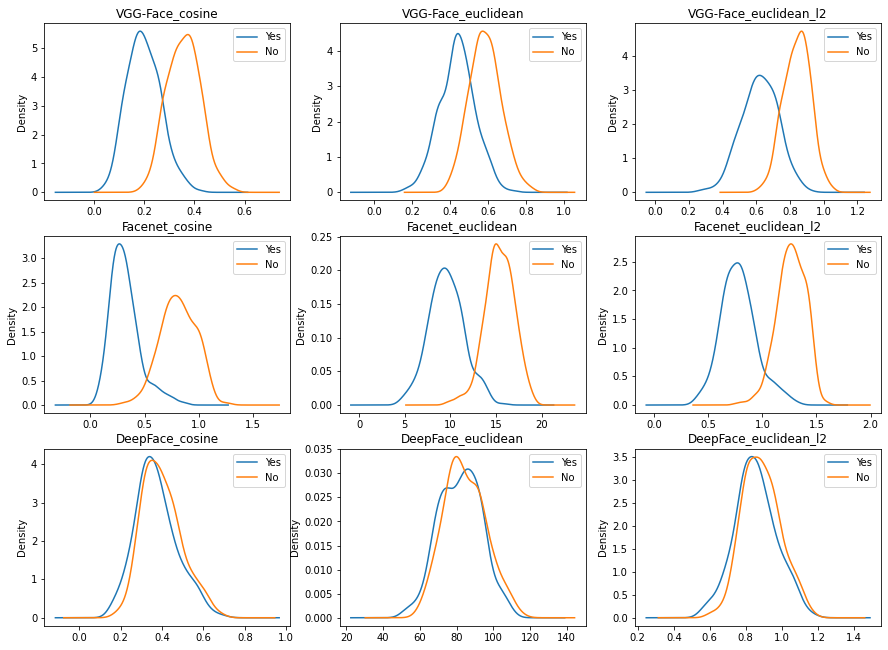

In [10]:


fig = plt.figure(figsize=(15, 15))

figure_idx = 1
for model in models:
    for metric in metrics:
        
        
        feature = '%s_%s' % (model, metric)

        ax1 = fig.add_subplot(4, 3, figure_idx)
        
        df[df.decision == "Yes"][feature].plot(kind='kde', title = feature, label = 'Yes', legend = True)
        df[df.decision == "No"][feature].plot(kind='kde', title = feature, label = 'No', legend = True)
        
        figure_idx = figure_idx + 1

plt.show()

# Pre-processing for model

In [11]:
columns = []
for model in models:
    for metric in metrics:
        if model == 'OpenFace' and metric == 'euclidean':
            continue
        else:
            feature = '%s_%s' % (model, metric)
            columns.append(feature)

columns.append("decision")

In [12]:
df = df[columns]


In [13]:

df.loc[df[df.decision == 'Yes'].index, 'decision'] = 1
df.loc[df[df.decision == 'No'].index, 'decision'] = 0

In [14]:
df.head()


,VGG-Face_cosine,VGG-Face_euclidean,VGG-Face_euclidean_l2,Facenet_cosine,Facenet_euclidean,Facenet_euclidean_l2,DeepFace_cosine,DeepFace_euclidean,DeepFace_euclidean_l2,decision
0,0.1076,0.2939,0.4640,0.1564,6.8556,0.5592,0.2951,65.6765,0.7682,1
1,0.1314,0.3245,0.5126,0.2157,8.2025,0.6568,0.3808,73.9771,0.8727,1
2,0.1031,0.4133,0.4540,0.2728,9.2224,0.7386,0.2637,69.5387,0.7263,1
3,0.1132,0.3065,0.4759,0.1301,6.2278,0.5102,0.3276,72.6463,0.8095,1
4,0.1099,0.3396,0.4689,0.2024,7.9683,0.6362,0.2524,62.0719,0.7105,1


# Train test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=34)


In [17]:
target_name = "decision"

y_train = df_train[target_name].values
x_train = df_train.drop(columns=[target_name]).values

y_test = df_test[target_name].values
x_test = df_test.drop(columns=[target_name]).values

# lightGBM


In [ ]:
!pip install lightgbm

In [18]:
import lightgbm as lgb


In [19]:
features = df.drop(columns=[target_name]).columns.tolist()

lgb_train = lgb.Dataset(x_train, y_train, feature_name = features)
lgb_test = lgb.Dataset(x_test, y_test, feature_name = features)

In [20]:
params = {
    'task': 'train'
    , 'boosting_type': 'gbdt'
    , 'objective': 'multiclass'
    , 'num_class': 2
    , 'metric': 'multi_logloss'
    , 'force_col_wise': 'true'
}

In [21]:
gbm = lgb.train(params, lgb_train, num_boost_round=400, early_stopping_rounds = 20 , valid_sets=[lgb_test])
# gbm = lgb.train(params, lgb_train, num_boost_round=400, valid_sets=[lgb_test])


[LightGBM] [Info] Total Bins 1512
[LightGBM] [Info] Number of data points in the train set: 502, number of used features: 9
[LightGBM] [Info] Start training from score -0.689171
[LightGBM] [Info] Start training from score -0.697139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's multi_logloss: 0.616062
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's multi_logloss: 0.552517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's multi_logloss: 0.499478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [22]:
gbm.save_model("face-recognition-ensemble-model_test30.txt")


# Evaluation

In [23]:
predictions = gbm.predict(x_test)


In [24]:
prediction_classes = []
classified = 0

index = 0
for prediction in predictions:
    prediction_class = np.argmax(prediction)
    prediction_classes.append(prediction_class)
    
    actual = y_test[index]
    
    print("prediction is ",prediction_class," whereas actual is ",actual)
    if actual == prediction_class:
        classified = classified + 1
    
    index = index + 1

#print(classified," instances are classified in ",len(predictions)," instances") 
print("accuracy: ",round(100*classified/len(predictions),2),"%")

prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas

In [25]:
print(classified," instances are classified in ",len(predictions)," instances") 


202  instances are classified in  216  instances


In [26]:
print(y_test), print(prediction_classes)

[0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0
 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1
 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0
 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1]
[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,

(None, None)

In [27]:
prediction_classes_test = np.array(prediction_classes) 
y_test_arr = y_test


print(y_test_arr.tolist()), print(prediction_classes)

[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

(None, None)

In [28]:
cm = confusion_matrix(y_test_arr.tolist(), prediction_classes_test)

In [29]:
cm

array([[102,   5],
       [  9, 100]], dtype=int64)

In [30]:
tn, fp, fn, tp = cm.ravel()


In [31]:
tn, fp, fn, tp


(102, 5, 9, 100)

In [32]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [33]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  95.23809523809523 %
Recall:  91.74311926605505 %
F1 score  93.45794392523365 %
Accuracy:  93.51851851851852 %


<Figure size 504x504 with 0 Axes>

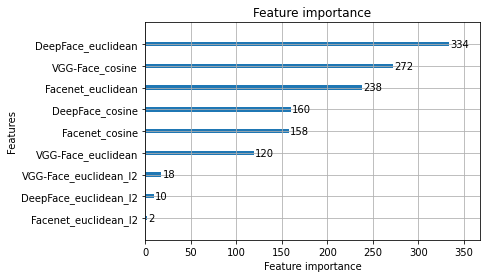

In [34]:
plt.figure(figsize=(7,7))
ax = lgb.plot_importance(gbm, max_num_features=20)
plt.show()

In [35]:
y_pred_proba = predictions[::,1]


In [36]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test_arr.tolist(),  y_pred_proba)
auc = metrics.roc_auc_score(y_test_arr.tolist(), y_pred_proba)

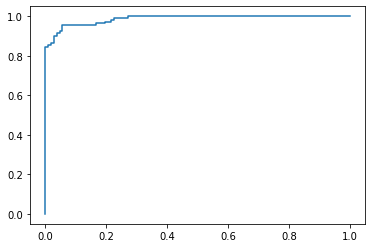

In [37]:
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

In [38]:
deepface_ensemble = lgb.Booster(model_file= 'face-recognition-ensemble-model_test30.txt')


In [43]:
from PIL import Image
testImage = Image.open("Test_img/demo1.jpg")
testimgNp = np.array(testImage, "uint8")

In [46]:
bulk_predictions = deepface_ensemble.predict("Test_img/demo1.jpg")
print(bulk_predictions)

LightGBMError: Unknown format of training data.

In [ ]:
demo = lgb.Booster(model_file= 'Train/face-recognition-ensemble-model.txt')


In [ ]:
demo.predict(x_test)

In [ ]:
x_test

array([[  0.2895,   0.4785,   0.7609, ...,   0.396 ,  83.0607,   0.89  ],
       [  0.261 ,   0.5256,   0.7225, ...,   0.4293,  91.0298,   0.9266],
       [  0.3693,   0.5743,   0.8594, ...,   0.5211, 105.4701,   1.0209],
       ...,
       [  0.1473,   0.4886,   0.5428, ...,   0.3248,  89.1159,   0.806 ],
       [  0.4308,   0.7894,   0.9282, ...,   0.6753, 111.7199,   1.1622],
       [  0.2076,   0.4764,   0.6444, ...,   0.3042,  81.149 ,   0.78  ]])